## 連結機房 SQL server資料庫

In [4]:
import pandas as pd
import pyodbc
server = '10.213.170.22'
database = 'LOUISA'
username = 'sa'
password = 'P@ssw0rd'
driver= '{ODBC Driver 13 for SQL Server}'
cnxn = pyodbc.connect('DRIVER='+driver+';PORT=1433;SERVER='+server+';PORT=1443;DATABASE='+database+';UID='+username+';PWD='+ password)
cursor = cnxn.cursor()

## 讀取資料表

In [2]:
import time
start = time.time()

data_frame4 = pd.read_sql('''SELECT [SL_KEY]
      ,[RECNO]
      ,[S_NO]
      ,[ID_NO]
      ,[SL_DATE]
      ,[SL_NO]  
      ,[P_NO]
      ,[DP_NO]   
      ,[SL_QTY]
      ,[SL_PRICE]
      ,[SL_AMT]
      ,[SL_TAXAMT]   
      ,[SL_DISC_AMT]
      ,[SL_TAXAMT_AMT]
      ,[RECNO_CCR]    
      ,[SEA_NO]
      ,[SEA_AMT]
      ,[MANUAL_DISC]   
      ,[SYS_DISC]
      ,[SYS_DISC_AMT]
      ,[SYS_DISC_AMT_D]

  FROM [LOUISA].[dbo].[SALE_D_V]
  WHERE [SL_DATE] > '20180101';''', cnxn)

end = time.time()
elapsed = end - start
print ("Time taken: ", elapsed, "seconds.")

Time taken:  3351.0703949928284 seconds.


## 資料轉成CSV

In [5]:
data_frame4.to_csv('result.csv')

NameError: name 'data_frame4' is not defined

## 資料讀取 

In [9]:
S_05071=pd.read_csv('S_05071.csv')

## 門店別、銷售日、門店銷售額

In [7]:
S_0507.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21629737 entries, 0 to 21629736
Data columns (total 5 columns):
S_NO       object
SL_DATE    int64
SL_NO      int64
PAY_NO     int64
PAY_AMT    float64
dtypes: float64(1), int64(3), object(1)
memory usage: 825.1+ MB


## 將日期轉換成周間日、將周間日轉為工作日A 非工作日B

In [10]:
S_05071.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21629737 entries, 0 to 21629736
Data columns (total 2 columns):
SL_DATE    int64
WeekDay    object
dtypes: int64(1), object(1)
memory usage: 330.0+ MB


## 將檔案合併

In [11]:
res=pd.concat([S_0507,S_05071], axis=1, join_axes=[S_0507.index])

In [23]:
res['PAY_AMT']=res['PAY_AMT'].astype(int)
res.dtypes

S_NO       object
SL_DATE     int64
SL_NO       int64
PAY_NO      int64
PAY_AMT     int32
SL_DATE     int64
WeekDay    object
dtype: object

## 查看資料、去重複值

In [24]:
res.head()

,S_NO,SL_DATE,SL_NO,PAY_NO,PAY_AMT,SL_DATE,WeekDay
0,E0001,20180102,1,1,191,20180102,A
1,E0001,20180102,2,1,205,20180102,A
2,E0001,20180102,3,1,120,20180102,A
3,E0001,20180102,4,1,85,20180102,A
4,E0001,20180102,5,1,45,20180102,A


In [25]:
S=res.drop(["PAY_NO","SL_NO","SL_DATE"],axis=1)

## 將A、B的欄位分開

In [26]:
S_A=S.loc[S['WeekDay']=='A',['S_NO','PAY_AMT']]

In [27]:
S_B=S.loc[S['WeekDay']=='B',['S_NO','PAY_AMT']]

## 產生A、B、A+B(TOTAL)三個欄位

In [28]:
S_TOTAL=S.groupby('S_NO').sum()

In [29]:
S_A=S_A.groupby('S_NO').sum()

In [30]:
S_B=S_B.groupby('S_NO').sum()

## 查看A、B、TOTAL資料模樣

In [31]:
S_A.head()


,PAY_AMT
S_NO,
E0001,7412933
E0004,4778095
E0005,2344601
E0007,1961544
E0011,5974713


In [61]:
S_A.dtypes

PAY_A    int32
dtype: object

In [63]:
S_B.head()

,PAY_B
S_NO,
E0001,99189
E0004,428057
E0005,153124
E0007,235473
E0011,51390


In [64]:
S_B.dtypes

PAY_B    int32
dtype: object

In [65]:
res['PAY_AMT']=res['PAY_AMT'].astype(int)
res.dtypes

S_NO       object
SL_DATE     int64
SL_NO       int64
PAY_NO      int64
PAY_AMT     int32
SL_DATE     int64
WeekDay    object
dtype: object

In [66]:
S_TOTAL.head()

,PAY_AMT
S_NO,
E0001,7512122
E0004,5206152
E0005,2497725
E0007,2197017
E0011,6026103


In [35]:
S_A=S_A.rename(columns={'PAY_AMT': 'PAY_A'})
S_A.head()

,PAY_A
S_NO,
E0001,7412933
E0004,4778095
E0005,2344601
E0007,1961544
E0011,5974713


In [36]:
S_B=S_B.rename(columns={'PAY_AMT': 'PAY_B'})
S_B.head()

,PAY_B
S_NO,
E0001,99189
E0004,428057
E0005,153124
E0007,235473
E0011,51390


In [37]:
S_Res= pd.concat([S_A,S_B,S_TOTAL], axis=1)

C:\Users\22\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [81]:

S_Res=S_Res.fillna(axis=1,method='ffill')
S_Res.shape

(350, 3)

In [39]:
S_A.shape

(350, 1)

In [43]:
import numpy as np

In [47]:
S_y=S_A.drop('PAY_A',axis=1)
y=S_y.values
y=y.astype(np.float16)
y

array([], shape=(350, 0), dtype=float16)

## 標準化、空值填補、空值檢查

In [94]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df_feature = sc.fit_transform(S_Res)
X=df_feature
X=X.astype(np.float)
X

array([[ 1.00798202, -1.36056954,  0.21487245],
       [ 0.09564608, -1.14094306, -0.33916512],
       [-0.74697273, -1.32455037, -0.98989792],
       ...,
       [ 0.58185927,  0.72263843,  0.66866563],
       [ 2.27870382,  1.43076802,  2.10083534],
       [-1.34428134, -1.40819152, -1.43445013]])

## K-MEANS

In [125]:
X=S_Res.astype(np.float)
X=X.values
X

array([[ 7412933.,    99189.,  7512122.],
       [ 4778095.,   428057.,  5206152.],
       [ 2344601.,   153124.,  2497725.],
       ...,
       [ 6182285.,  3218578.,  9400863.],
       [11082794.,  4278929., 15361723.],
       [  619566.,    27880.,   647446.]])

In [103]:
S_Res.to_csv('S_Res.csv')

In [ ]:
data=df.loc[S_Res['']]

In [104]:
pwd

'C:\\Users\\22'

In [72]:
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import Imputer
# 資料可視化套件
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [138]:
X[:,0]

array([7.4129330e+06, 4.7780950e+06, 2.3446010e+06, 1.9615440e+06,
       5.9747130e+06, 4.1924530e+06, 3.0187860e+06, 4.9873890e+06,
       5.2538530e+06, 6.8670890e+06, 5.5186300e+06, 9.7457800e+06,
       4.4819510e+06, 4.6043010e+06, 7.4350790e+06, 2.0467560e+06,
       4.8497810e+06, 8.2451450e+06, 2.3491970e+06, 8.3371600e+05,
       7.6863400e+05, 4.4550930e+06, 2.0268870e+06, 6.5666270e+06,
       8.2308650e+06, 7.1488000e+06, 5.8666190e+06, 4.5938300e+05,
       7.7888660e+06, 4.2392800e+06, 4.0334610e+06, 9.0857610e+06,
       7.7273100e+06, 3.2739520e+06, 3.4464220e+06, 6.5766550e+06,
       8.6591260e+06, 6.6962920e+06, 4.9421440e+06, 5.5102970e+06,
       4.8667950e+06, 4.0585730e+06, 2.3882700e+05, 2.3251880e+06,
       5.5279100e+06, 7.3393890e+06, 1.2077190e+06, 7.6160030e+06,
       3.4359950e+06, 6.3104820e+06, 6.3244600e+06, 8.5650890e+06,
       4.0858430e+06, 7.6521400e+06, 4.7041980e+06, 9.4626500e+06,
       1.9765570e+06, 7.2773670e+06, 3.4154120e+06, 3.5107400e

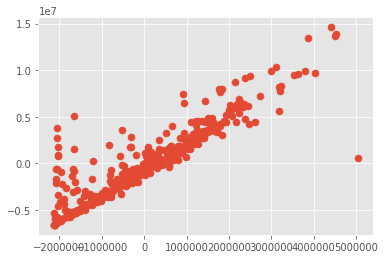

In [145]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=2,    #中心數
          max_iter=50000,  #整形，預設300
          init='k-means++',#演算法1.kmeans++2.random3.ndarray
          n_init=10,       #整形，預設300
          tol=0.0001,      #收斂條件
          random_state=1,  #整形或 numpy.RandomState 类型，可选 
          copy_x='False'   #布爾型，預設True
          )
y_km=km.fit_predict(X)

import matplotlib.pyplot as plt
plt.scatter(X[:,1],X[:,2],s=50,cmap='RdBu')

In [85]:
import numpy as np 
from matplotlib import cm
from sklearn.metrics import silhouette_samples
cluster_labels=np.unique(y_km)
n_clusters=cluster_labels.shape[0]
silhouette_vals=silhouette_samples(S_Res,
                                   y_km,
                                   metric='euclidean')

In [116]:
X

array([[ 1.00798202, -1.36056954,  0.21487245],
       [ 0.09564608, -1.14094306, -0.33916512],
       [-0.74697273, -1.32455037, -0.98989792],
       ...,
       [ 0.58185927,  0.72263843,  0.66866563],
       [ 2.27870382,  1.43076802,  2.10083534],
       [-1.34428134, -1.40819152, -1.43445013]])

## DBScan

In [50]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

df.salary = df.salary.astype(float)                   #traform into float type
df.working = df.working.astype(float)                 #traform into float type
X = df[['salary','working']].values                   #tranform DataFrame to ndarray Matrix  為了predict輸入的方式

NameError: name 'df' is not defined

In [12]:
data_frame4.tail()

,SL_KEY,RECNO,S_NO,ID_NO,SL_DATE,SL_NO,P_NO,DP_NO,SL_QTY,SL_PRICE,...,SL_TAXAMT,SL_DISC_AMT,SL_TAXAMT_AMT,RECNO_CCR,SEA_NO,SEA_AMT,MANUAL_DISC,SYS_DISC,SYS_DISC_AMT,SYS_DISC_AMT_D
38330070,Y0085Y008512019033003751,1,Y0085,Y00851,20190330,0375,030104,0301,1.0,45.0,...,40.0,5.0,1.90,1,,0.0,,[青檸塔兩件80],5.0,-5
38330071,Y0085Y008512019033003751,2,Y0085,Y00851,20190330,0375,030104,0301,1.0,45.0,...,40.0,5.0,1.90,2,,0.0,,[青檸塔兩件80],5.0,-5
38330072,Y0085Y008512019033003761,1,Y0085,Y00851,20190330,0376,050101,0501,1.0,45.0,...,45.0,0.0,2.14,1,,0.0,,,0.0,
38330073,Y0085Y008512019033003771,1,Y0085,Y00851,20190330,0377,050803,0508,1.0,55.0,...,55.0,0.0,2.62,1,0103-001/0305-001/,0.0,,,0.0,
38330074,Y0085Y008512019033003781,1,Y0085,Y00851,20190330,0378,020307M,0203,1.0,60.0,...,60.0,0.0,2.86,1,0109-001/0306-001/,0.0,,,0.0,


In [11]:
df4.tail()

,Unnamed: 0,SL_KEY,RECNO,S_NO,ID_NO,SL_DATE,SL_NO,P_NO,DP_NO,SL_QTY,...,SL_TAXAMT,SL_DISC_AMT,SL_TAXAMT_AMT,RECNO_CCR,SEA_NO,SEA_AMT,MANUAL_DISC,SYS_DISC,SYS_DISC_AMT,SYS_DISC_AMT_D
38330070,38330070,Y0085Y008512019033003751,1,Y0085,Y00851,20190330,375,030104,301.0,1.0,...,40.0,5.0,1.90,1,NaN,0.0,NaN,[青檸塔兩件80],5.0,-5
38330071,38330071,Y0085Y008512019033003751,2,Y0085,Y00851,20190330,375,030104,301.0,1.0,...,40.0,5.0,1.90,2,NaN,0.0,NaN,[青檸塔兩件80],5.0,-5
38330072,38330072,Y0085Y008512019033003761,1,Y0085,Y00851,20190330,376,050101,501.0,1.0,...,45.0,0.0,2.14,1,NaN,0.0,NaN,NaN,0.0,NaN
38330073,38330073,Y0085Y008512019033003771,1,Y0085,Y00851,20190330,377,050803,508.0,1.0,...,55.0,0.0,2.62,1,0103-001/0305-001/,0.0,NaN,NaN,0.0,NaN
38330074,38330074,Y0085Y008512019033003781,1,Y0085,Y00851,20190330,378,020307M,203.0,1.0,...,60.0,0.0,2.86,1,0109-001/0306-001/,0.0,NaN,NaN,0.0,NaN


In [15]:
data_frame4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38330075 entries, 0 to 38330074
Data columns (total 21 columns):
SL_KEY            object
RECNO             int64
S_NO              object
ID_NO             object
SL_DATE           object
SL_NO             object
P_NO              object
DP_NO             object
SL_QTY            float64
SL_PRICE          float64
SL_AMT            float64
SL_TAXAMT         float64
SL_DISC_AMT       float64
SL_TAXAMT_AMT     float64
RECNO_CCR         int64
SEA_NO            object
SEA_AMT           float64
MANUAL_DISC       object
SYS_DISC          object
SYS_DISC_AMT      float64
SYS_DISC_AMT_D    object
dtypes: float64(8), int64(2), object(11)
memory usage: 6.0+ GB


In [16]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38330075 entries, 0 to 38330074
Data columns (total 22 columns):
Unnamed: 0        int64
SL_KEY            object
RECNO             int64
S_NO              object
ID_NO             object
SL_DATE           int64
SL_NO             int64
P_NO              object
DP_NO             float64
SL_QTY            float64
SL_PRICE          float64
SL_AMT            float64
SL_TAXAMT         float64
SL_DISC_AMT       float64
SL_TAXAMT_AMT     float64
RECNO_CCR         int64
SEA_NO            object
SEA_AMT           float64
MANUAL_DISC       object
SYS_DISC          object
SYS_DISC_AMT      float64
SYS_DISC_AMT_D    object
dtypes: float64(9), int64(5), object(8)
memory usage: 6.3+ GB


In [17]:
pwd

'C:\\Users\\22'

In [16]:
data_frame2 = pd.read_sql('''select * from [BI].[dbo].[STORE_V]''', cnxn)
data_frame2

,S_NO,S_NAME,S_NAME_S,R_NO,S_STATUS,S_IP,S_ID,S_TAXNO,S_KIND,S_ADDR,...,MU_NO_SET,NIDIN_ACCOUNT,NIDIN_PASSWORD,FTP_IP,FTP_PORT,FTP_ID,FTP_PWD,S_TYPE,OUTLYING_TYPE,MU_NO_COUPON
0,00000,總公司,總公司,0000,1,,0,0,1,0,...,,,,,,,,None,,
1,E0001,民生店,民生店,0003,1,220.136.106.32,48872320,111800834,2,台北市松山區民生東路三段130巷7弄1號,...,,,,,,,,None,,
2,E0002,民權店,民權店,9997,2,,1,42276704,2,台北市中山區松江路313巷22號之2,...,None,None,None,None,None,None,None,None,None,None
3,E0003,南西店,南西店,9997,2,,26375299,26375299,2,台北市中山區中山北路一段140巷138號,...,None,None,None,None,None,None,None,None,None,None
4,E0004,忠孝新生店,忠孝新生,0003,1,1.160.9.230,42493104,0,2,台北市中正區臨沂街27巷9-4號,...,None,None,None,None,None,None,None,None,None,None
5,E0005,三民店,三民店,0003,1,122.116.60.226,31958962,110509467,2,台北市松山區南京東路五段163-13號,...,,LC-E0005,x385aftgup9k,,,,,None,,
6,E0006,忠孝216店,忠孝216店,9997,2,,31950096,0,2,台北市大安區忠孝東路四段216巷52號,...,None,None,None,None,None,None,None,None,None,None
7,E0007,新店寶橋店,新店寶橋,0003,1,118.168.237.204,37907717,0,2,新北市新店區寶橋路212號,...,,,,,,,,None,,
8,E0009,中和概念店,中和概念,9997,2,202.3.165.2,02146712,02146712,2,新北市中和區連城路250號1樓 I棟A戶,...,None,None,None,None,None,None,None,None,None,None
9,E0010,國泰店,國泰店,9997,2,,38505769,38505769,2,台北市大安區仁愛路四段300巷13-1號,...,None,None,None,None,None,None,None,None,None,None


In [ ]:
data_frame2 = pd.read_sql('''select * from [BI].[dbo].[STORE_V]''', cnxn)
data_frame2

In [9]:
data_frame3

,S_NO,S_NAME,S_NAME_S,R_NO,S_STATUS,S_IP,S_ID,S_TAXNO,S_KIND,S_ADDR,...,MU_NO_SET,NIDIN_ACCOUNT,NIDIN_PASSWORD,FTP_IP,FTP_PORT,FTP_ID,FTP_PWD,S_TYPE,OUTLYING_TYPE,MU_NO_COUPON
0,00000,總公司,總公司,0000,1,,0,0,1,0,...,,,,,,,,None,,
1,E0001,民生店,民生店,0003,1,220.136.106.32,48872320,111800834,2,台北市松山區民生東路三段130巷7弄1號,...,,,,,,,,None,,
2,E0002,民權店,民權店,9997,2,,1,42276704,2,台北市中山區松江路313巷22號之2,...,None,None,None,None,None,None,None,None,None,None
3,E0003,南西店,南西店,9997,2,,26375299,26375299,2,台北市中山區中山北路一段140巷138號,...,None,None,None,None,None,None,None,None,None,None
4,E0004,忠孝新生店,忠孝新生,0003,1,1.160.9.230,42493104,0,2,台北市中正區臨沂街27巷9-4號,...,None,None,None,None,None,None,None,None,None,None
5,E0005,三民店,三民店,0003,1,122.116.60.226,31958962,110509467,2,台北市松山區南京東路五段163-13號,...,,LC-E0005,x385aftgup9k,,,,,None,,
6,E0006,忠孝216店,忠孝216店,9997,2,,31950096,0,2,台北市大安區忠孝東路四段216巷52號,...,None,None,None,None,None,None,None,None,None,None
7,E0007,新店寶橋店,新店寶橋,0003,1,118.168.237.204,37907717,0,2,新北市新店區寶橋路212號,...,,,,,,,,None,,
8,E0009,中和概念店,中和概念,9997,2,202.3.165.2,02146712,02146712,2,新北市中和區連城路250號1樓 I棟A戶,...,None,None,None,None,None,None,None,None,None,None
9,E0010,國泰店,國泰店,9997,2,,38505769,38505769,2,台北市大安區仁愛路四段300巷13-1號,...,None,None,None,None,None,None,None,None,None,None


In [5]:
import pandas as  pd
import pyodbc
server = '172.16.1.15'
database = 'BI'
username = 'csd'
password = 'Csd@2019'
driver= '{ODBC Driver 13 for SQL Server}'
cnxn = pyodbc.connect('DRIVER='+driver+';PORT=1433;SERVER='+server+';PORT=1443;DATABASE='+database+';UID='+username+';PWD='+ password)
cursor = cnxn.cursor()

AttributeError: module 'pandas' has no attribute '_libs'

In [9]:
from pyspark import SparkContext

In [6]:
!pip install xlrd
df=pd.read_excel('ll.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 992 entries, 0 to 991
Data columns (total 20 columns):
SL_KEY            992 non-null object
RECNO             992 non-null int64
S_NO              992 non-null object
ID_NO             992 non-null object
SL_DATE           992 non-null int64
SL_NO             992 non-null int64
P_NO              992 non-null object
DP_NO             992 non-null int64
SL_QTY            992 non-null int64
SL_PRICE          992 non-null int64
SL_AMT            992 non-null int64
SL_TAXAMT         992 non-null int64
SL_DISC_AMT       992 non-null int64
SL_TAXAMT_AMT     992 non-null float64
RECNO_CCR         992 non-null int64
SEA_NO            956 non-null object
SEA_AMT           992 non-null int64
SYS_DISC          168 non-null object
SYS_DISC_AMT      992 non-null int64
SYS_DISC_AMT_D    165 non-null float64
dtypes: float64(2), int64(12), object(6)
memory usage: 131.8+ KB
